In [1]:
import pandas as pd  
import numpy as np  
import scipy as sp
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import math
from datetime import datetime

In [1]:
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


In [4]:

#pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline

# load data

In [5]:
covid19_dfA=pd.read_csv('MSDS422_covid19_20200825v3.csv')

In [6]:
covid19full = pd.read_csv("download_ecdc.csv")

In [7]:
# data quality review

In [8]:
print("Shape:", covid19full.shape,"\n")
print("Variable Types:") 
print(covid19full.dtypes)

#covid19full(15)

Shape: (43718, 12) 

Variable Types:
dateRep                                                        object
day                                                             int64
month                                                           int64
year                                                            int64
cases                                                           int64
deaths                                                          int64
countriesAndTerritories                                        object
geoId                                                          object
countryterritoryCode                                           object
popData2019                                                   float64
continentExp                                                   object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    float64
dtype: object


In [9]:
covid19full =covid19full.dropna()

In [118]:
covid19_dfA.describe()

,Day,Month,Year,Cases,Deaths,Population,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death,min_max_cum_cases,min_max_cum_death,std_cumsum_cases,std_cumsum_death,total_cumsum_cases
count,38492.000000,38492.000000,38492.000000,38492.000000,38492.000000,3.849200e+04,38492.000000,3.849200e+04,38492.000000,38492.000000,38492.000000,3.849200e+04,3.849200e+04,38492.000000
mean,15.810558,5.192585,2019.998259,615.382937,21.247376,4.384876e+07,27.128374,3.617301e+04,1662.431518,0.006301,0.009377,1.064259e-15,9.188629e-15,64129.706588
std,8.694756,1.995496,0.041685,3815.217442,125.237191,1.598573e+08,67.447288,2.281671e+05,9212.465554,0.039744,0.051966,1.000013e+00,1.000013e+00,66838.575184
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,-1.262589,0.000000e+00,0.000000,0.000000,0.000000,-1.585394e-01,-1.804569e-01,0.000000
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.394969e+06,0.060058,3.000000e+01,0.000000,0.000005,0.000000,-1.584079e-01,-1.804569e-01,8971.500000
50%,16.000000,5.000000,2020.000000,7.000000,0.000000,8.519373e+06,2.882863,7.030000e+02,12.000000,0.000122,0.000068,-1.554583e-01,-1.791543e-01,46031.000000
75%,23.000000,7.000000,2020.000000,126.000000,2.000000,3.036604e+07,19.221559,7.377000e+03,149.000000,0.001285,0.000840,-1.262074e-01,-1.642830e-01,89777.250000
max,31.000000,12.000000,2020.000000,78427.000000,4928.000000,1.433784e+09,1058.225943,5.740909e+06,177279.000000,1.000000,1.000000,2.500278e+01,1.906318e+01,298094.000000


In [11]:
covid19_dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38492 entries, 0 to 38491
Data columns (total 10 columns):
Date                             38492 non-null object
Day                              38492 non-null int64
Month                            38492 non-null int64
Year                             38492 non-null int64
Cases                            38492 non-null int64
Deaths                           38492 non-null int64
Country                          38492 non-null object
Population                       38492 non-null int64
Continent                        38492 non-null object
CumulativeNumberPer100KCases     38492 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.9+ MB


In [12]:
for cols in covid19full.columns.tolist()[1:]:
    if covid19full[cols].dtype == "object":
        next
    else:
        covid19full= covid19full[covid19full[cols] >= 0]

In [13]:
len(covid19full.geoId.unique())

208

In [14]:
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (38492, 10) 

Variable Types:
Date                              object
Day                                int64
Month                              int64
Year                               int64
Cases                              int64
Deaths                             int64
Country                           object
Population                         int64
Continent                         object
CumulativeNumberPer100KCases     float64
dtype: object


,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases
0,25/08/2020,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749
1,24/08/2020,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112
2,23/08/2020,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112
3,22/08/2020,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619
4,21/08/2020,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766
5,20/08/2020,20,8,2020,160,8,Afghanistan,38041757,Asia,2.268560
6,19/08/2020,19,8,2020,0,0,Afghanistan,38041757,Asia,2.024092
7,18/08/2020,18,8,2020,3,0,Afghanistan,38041757,Asia,2.239644
8,17/08/2020,17,8,2020,45,5,Afghanistan,38041757,Asia,2.329020
9,16/08/2020,16,8,2020,120,7,Afghanistan,38041757,Asia,2.210729


In [15]:
# number of unique countries

In [16]:

len(covid19_dfA.Country.unique())

210

In [17]:
# summary statistics
covid19_dfA.describe()

,Day,Month,Year,Cases,Deaths,Population,CumulativeNumberPer100KCases
count,38492.000000,38492.000000,38492.000000,38492.000000,38492.000000,3.849200e+04,38492.000000
mean,15.810558,5.192585,2019.998259,615.382937,21.247376,4.384876e+07,27.128374
std,8.694756,1.995496,0.041685,3815.217442,125.237191,1.598573e+08,67.447288
min,1.000000,1.000000,2019.000000,0.000000,0.000000,8.150000e+02,-1.262589
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.394969e+06,0.060058
50%,16.000000,5.000000,2020.000000,7.000000,0.000000,8.519373e+06,2.882863
75%,23.000000,7.000000,2020.000000,126.000000,2.000000,3.036604e+07,19.221559
max,31.000000,12.000000,2020.000000,78427.000000,4928.000000,1.433784e+09,1058.225943


Preprocess Data for Analysis
Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [18]:
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['Date'], format='%Y/%m/%d')
covid19_dfA['Date'].head()

0   2020-08-25
1   2020-08-24
2   2020-08-23
3   2020-08-22
4   2020-08-21
Name: Date, dtype: datetime64[ns]

In [19]:
covid19_dfA.dtypes

Date                             datetime64[ns]
Day                                       int64
Month                                     int64
Year                                      int64
Cases                                     int64
Deaths                                    int64
Country                                  object
Population                                int64
Continent                                object
CumulativeNumberPer100KCases            float64
dtype: object

In [20]:
covid19_dfA.isnull().sum()

Date                             0
Day                              0
Month                            0
Year                             0
Cases                            0
Deaths                           0
Country                          0
Population                       0
Continent                        0
CumulativeNumberPer100KCases     0
dtype: int64

In [21]:
covid19_dfA.shape

(38492, 10)

In [22]:
cd = covid19_dfA.groupby("Country")["Cases"]

In [23]:
#covid19_dfA['Cases'].d(by=covid19_dfA['Continent'])

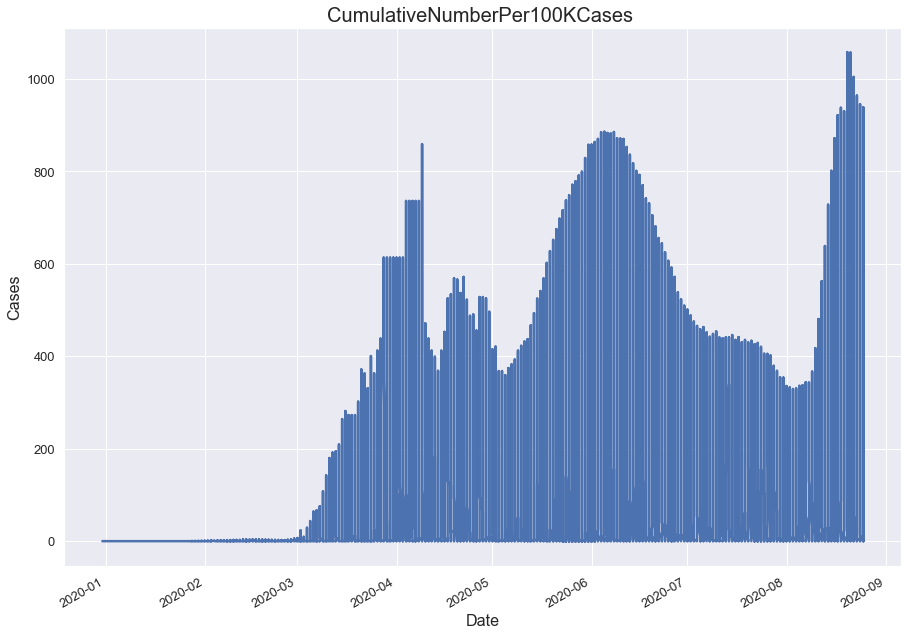

In [24]:
world_daily = covid19_dfA.set_index('Date')
sns.set_color_codes("c")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['CumulativeNumberPer100KCases '].plot(linewidth = 2.5)


plt.title('CumulativeNumberPer100KCases ', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

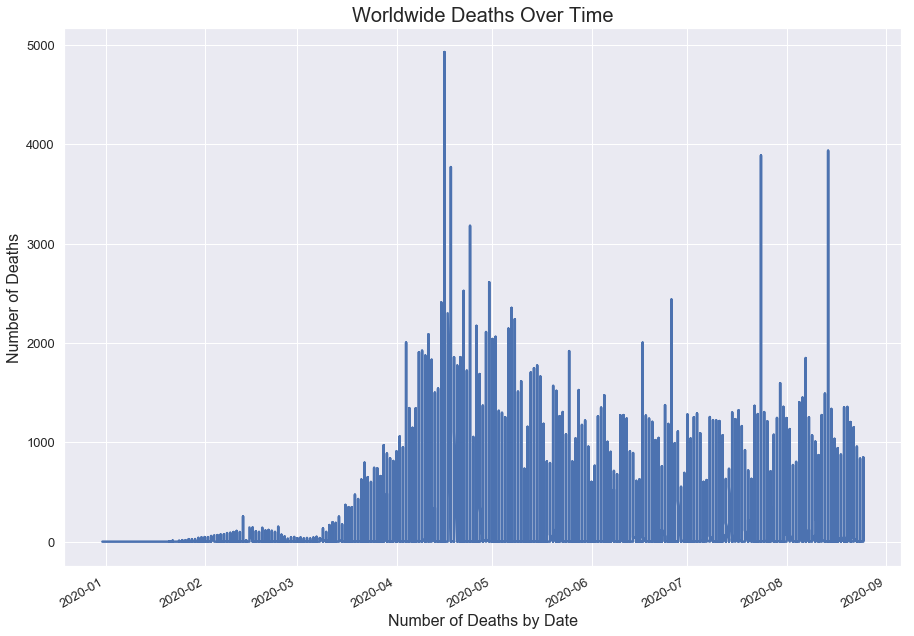

In [27]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['Deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

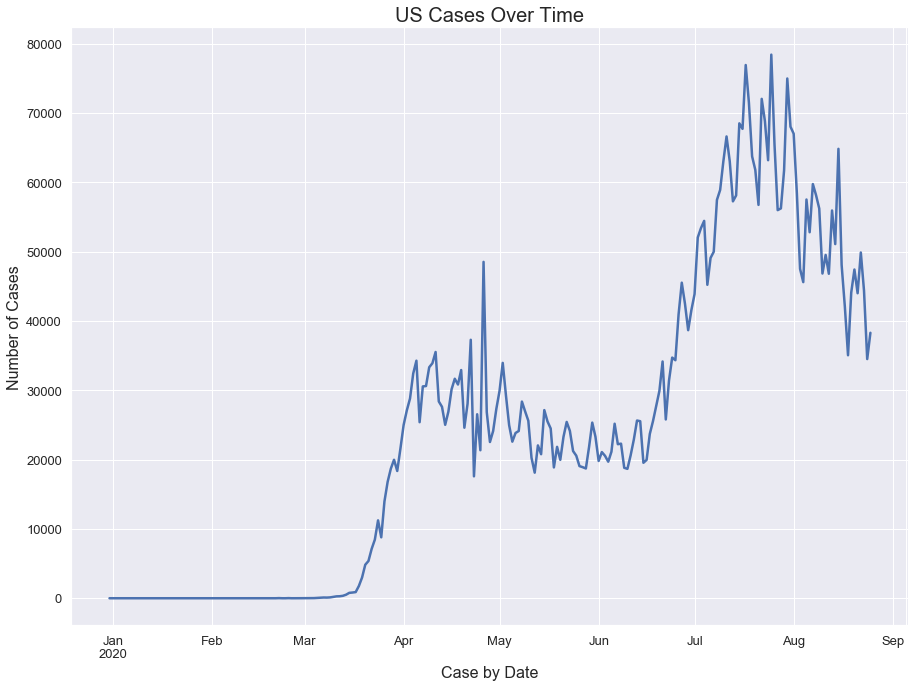

In [28]:

UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

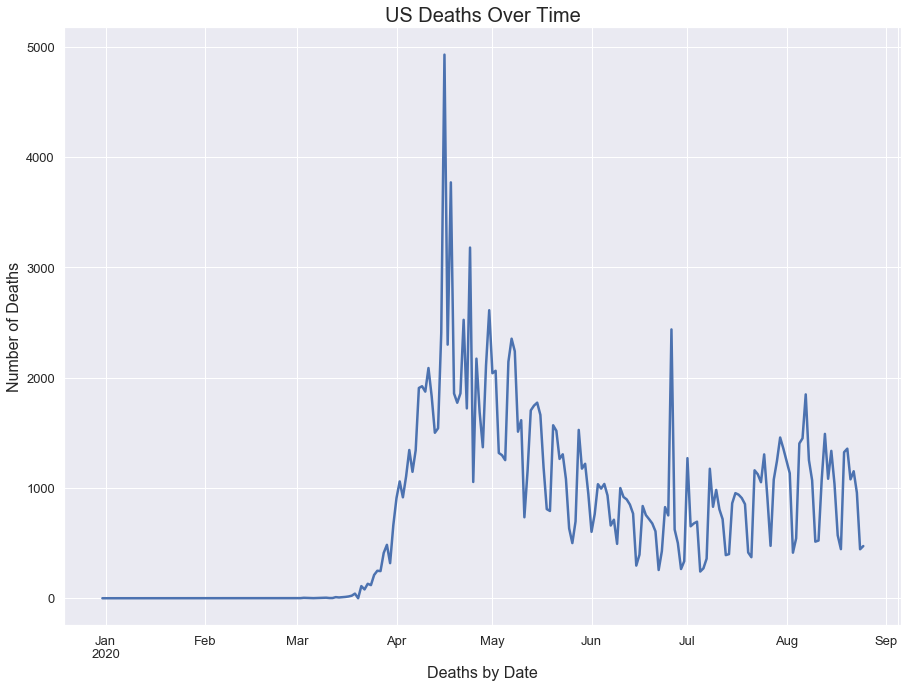

In [29]:
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['Deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

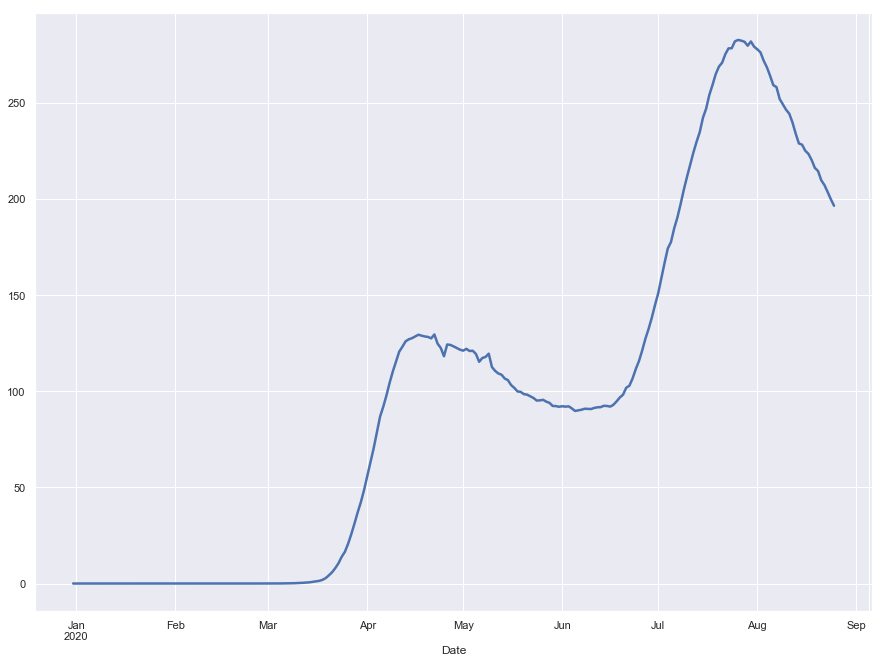

In [30]:
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['CumulativeNumberPer100KCases '].plot(linewidth = 2.5)

In [89]:
covid19_deaths = covid19_dfA.groupby(["Country","Population"])["Deaths","Cases"].sum().reset_index()

In [90]:
covid19_deaths["Death_per_million"] = covid19_deaths["Deaths"]/covid19_deaths["Population"] *1000000


In [131]:
covid19_deaths["Cases_per_million"] = covid19_deaths["Cases"]/covid19_deaths["Population"] *1000000

In [91]:
covid19_deaths["Death_pct_cases"] = covid19_deaths["Deaths"]/covid19_deaths["Cases"]*100

In [139]:
covid19_deaths.sort_values("Death_pct_cases", ascending=False).head(10).drop(columns=["min_max_cases"])

,Country,Population,Deaths,Cases,Death_per_million,Death_pct_cases,Cases_per_million
207,Yemen,29161922,555,1916,19.031667,28.966597,65.702117
99,Italy,60359546,35503,260594,588.191966,13.623875,4317.361830
198,United_Kingdom,66647112,41433,326614,621.677350,12.685617,4900.647458
70,France,67012883,30528,246386,455.554195,12.390314,3676.696017
18,Belgium,11455519,9996,81998,872.592503,12.190541,7157.947187
90,Hungary,9772756,613,5191,62.725397,11.808900,531.170532
126,Mexico,127575529,60800,563705,476.580426,10.785783,4418.598178
137,Netherlands,17282163,6193,67062,358.346348,9.234738,3880.417052
102,Jersey,107796,32,364,296.857026,8.791209,3376.748673
179,Spain,46937060,32712,407606,696.933297,8.025397,8684.097385


In [88]:
#covid19_deaths =covid19_deaths.drop(columns=["Death_pct_cases"])

In [35]:
cd_20 = covid19_deaths.sort_values("Death_per_million", ascending = False).reset_index().head(20)

In [103]:
covid19_deaths["min_max_cases"]= minmax_scale(covid19_deaths["Cases"])

C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


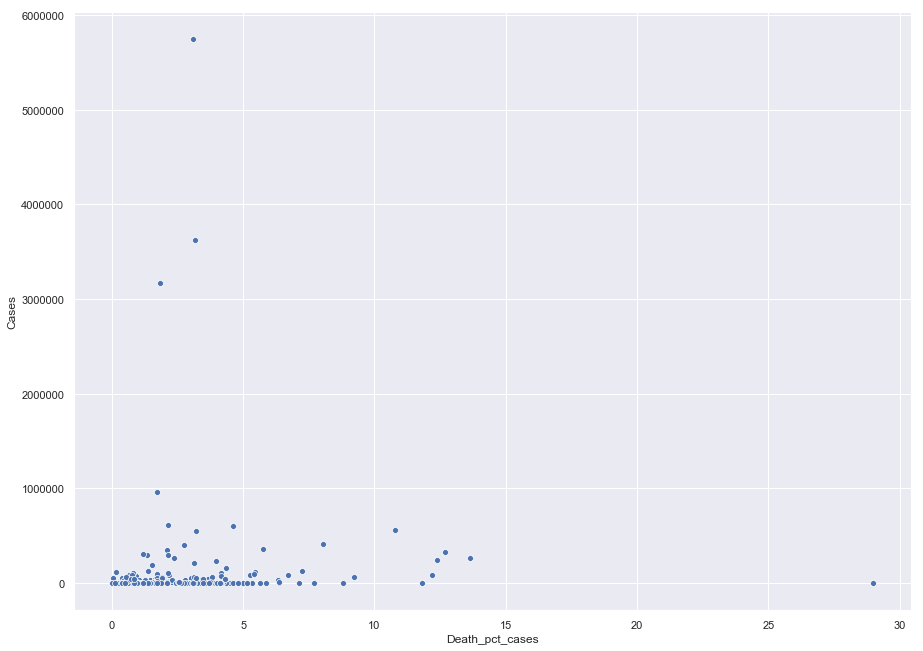

In [105]:
sns.scatterplot(x="Death_pct_cases", y = "Cases", data= covid19_deaths)

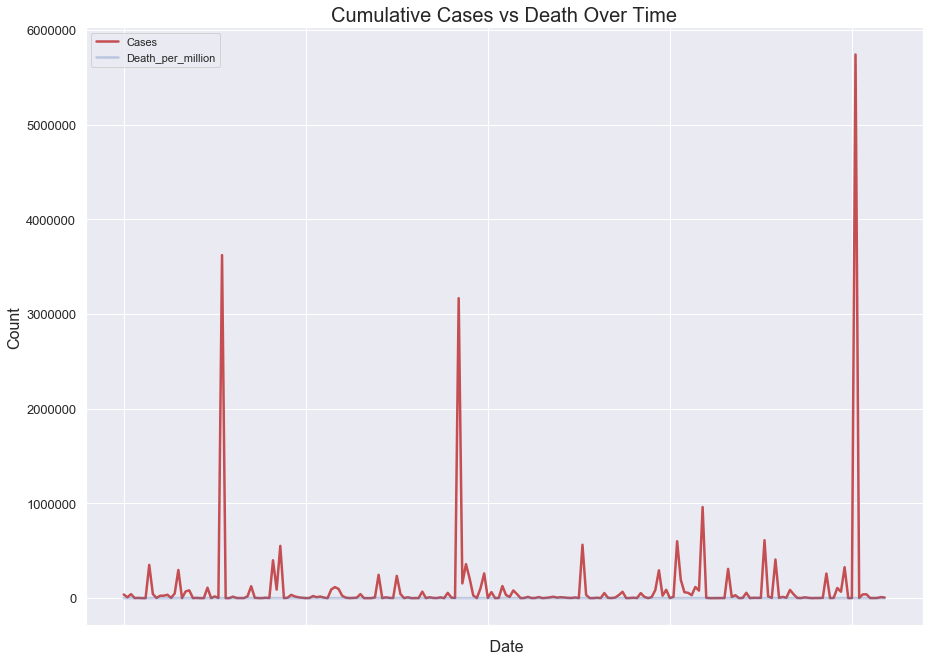

In [101]:
fig, ax = plt.subplots()
cd_20 = covid19_deaths.set_index("Country")

sns.set(rc={'figure.figsize':(15, 11)})
cd_20['Cases'].plot(ax= ax, linewidth = 2.5, color='r')
cd_20['Death_per_million'].plot(ax= ax, linewidth = 2.5, alpha = 0.3)

plt.title('Cumulative Cases vs Death Over Time', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()

plt.show()

C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


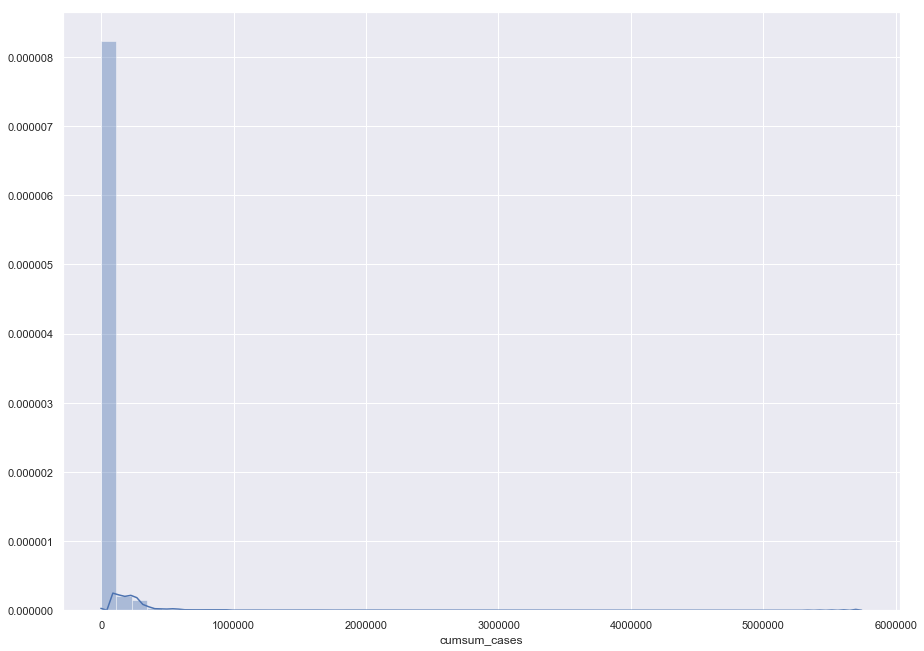

In [121]:
sns.distplot( covid19_dfA["cumsum_cases"], bins=50)

In [38]:
covid19_deaths.loc[covid19_deaths["Country"]=="India"]

,Country,Population,Deaths,Cases,Death_per_million
92,India,1366417756,58390,3167323,42.732173


In [41]:
#sns.scatterplot(x= "Death_pct_cases", y = "Death_per_million", data = covid19_deaths)

In [39]:
covid19_dfA["cumsum_cases"] = covid19_dfA.sort_values(["Country","Date"]).groupby(["Country"])["Cases"].cumsum()

In [40]:
covid19_dfA["cumsum_death"] = covid19_dfA.sort_values(["Country","Date"]).groupby(["Country"])["Deaths"].cumsum()

In [41]:
covid19_dfA. head()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death
0,2020-08-25,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749,38070,1397
1,2020-08-24,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112,37999,1387
2,2020-08-23,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112,37999,1387
3,2020-08-22,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619,37894,1385
4,2020-08-21,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766,37856,1385


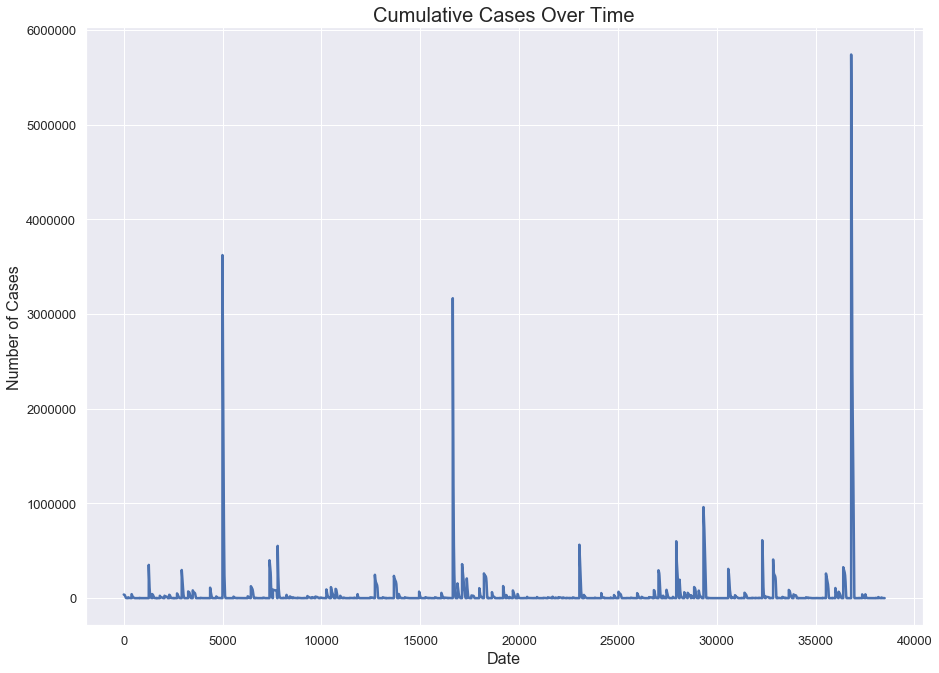

In [42]:
#plot wold cumilative cases

#covid19_dfA = covid19_dfA.set_index('Date')
sns.set(rc={'figure.figsize':(15, 11)})
covid19_dfA['cumsum_cases'].plot(linewidth = 2.5)

plt.title('Cumulative Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

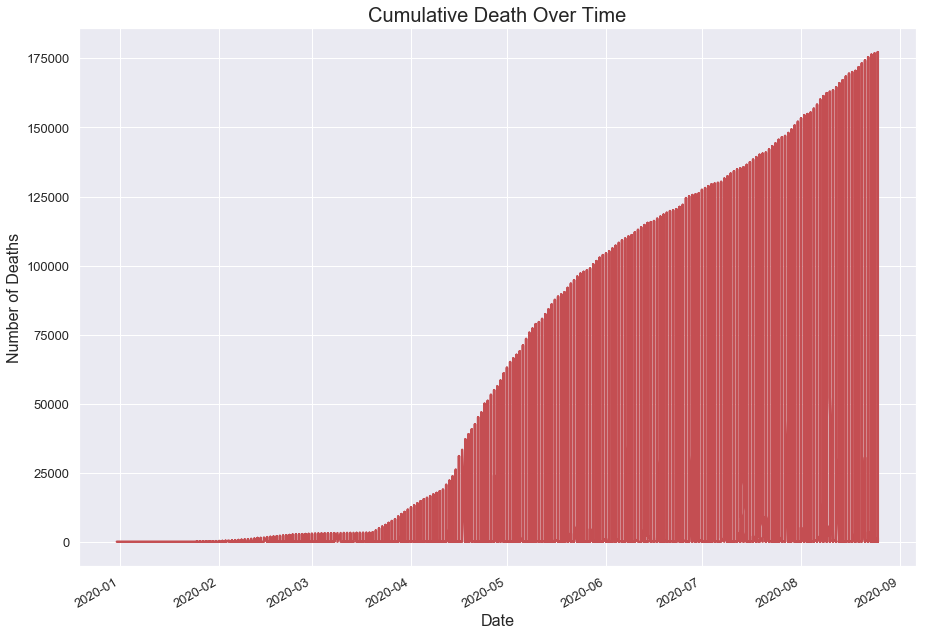

In [205]:
sns.set(rc={'figure.figsize':(15, 11)})
covid19_dfA['cumsum_death'].plot(linewidth = 2.5, color='r')

plt.title('Cumulative Death Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)


plt.show()

In [48]:
sns.lineplott(x= "Date", y = "cumsum_death", hue = "Country", data= covid19_dfA)

AttributeError: module 'seaborn' has no attribute 'lineplott'

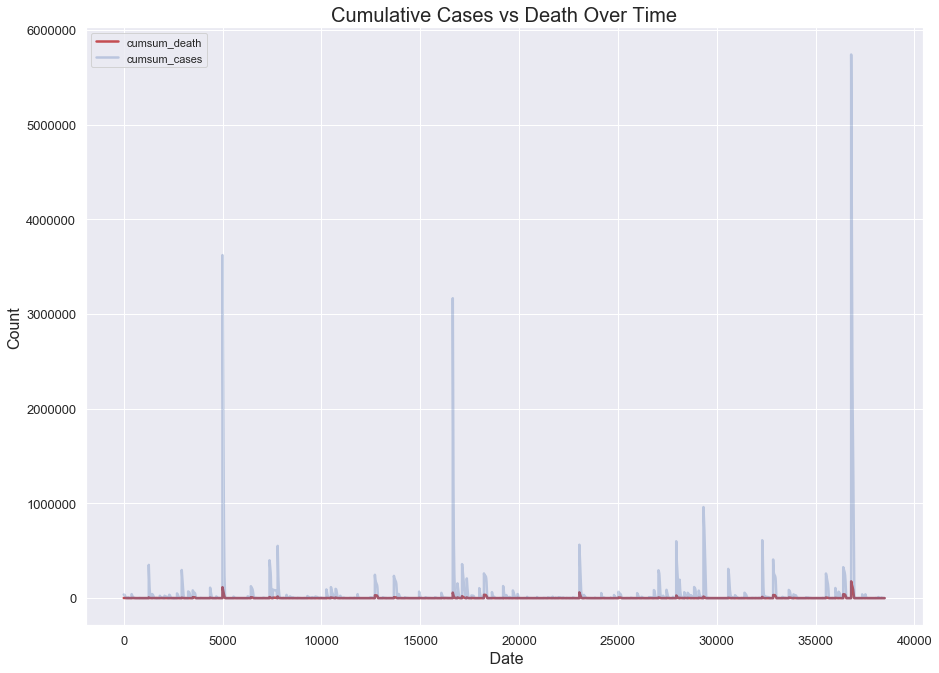

In [43]:
# plot cumilaitve death worlwide

#covid19_dfA = covid19_dfA.set_index('Date')
fig, ax = plt.subplots()

sns.set(rc={'figure.figsize':(15, 11)})
covid19_dfA['cumsum_death'].plot(ax= ax, linewidth = 2.5, color='r')
covid19_dfA['cumsum_cases'].plot(ax= ax, linewidth = 2.5, alpha = 0.3)

plt.title('Cumulative Cases vs Death Over Time', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)

leg = ax.legend()

plt.show()

In [110]:
# reset index date
covid19_dfA= covid19_dfA.reset_index()

In [44]:
# datafrae for USA cases
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

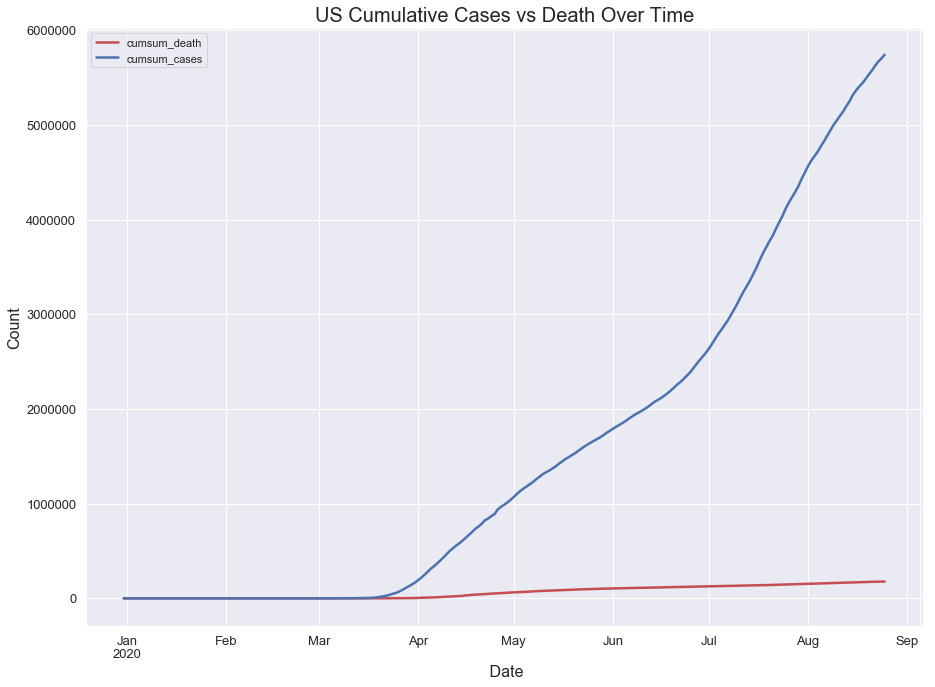

In [45]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cumsum_death'].plot(ax= ax, linewidth = 2.5, color='r')
US_daily['cumsum_cases'].plot(ax= ax, linewidth = 2.5)

plt.title('US Cumulative Cases vs Death Over Time', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()

plt.show()

In [46]:
US_daily.head()

,index,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death
Date,,,,,,,,,,,,
2020-08-25,36797,25,8,2020,38298,473,United_States_of_America,329064917,America,196.470352,5740909,177279
2020-08-24,36798,24,8,2020,34506,444,United_States_of_America,329064917,America,199.883660,5702611,176806
2020-08-23,36799,23,8,2020,44378,956,United_States_of_America,329064917,America,203.633984,5668105,176362
2020-08-22,36800,22,8,2020,49880,1151,United_States_of_America,329064917,America,207.232970,5623727,175406
2020-08-21,36801,21,8,2020,44005,1078,United_States_of_America,329064917,America,209.746152,5573847,174255


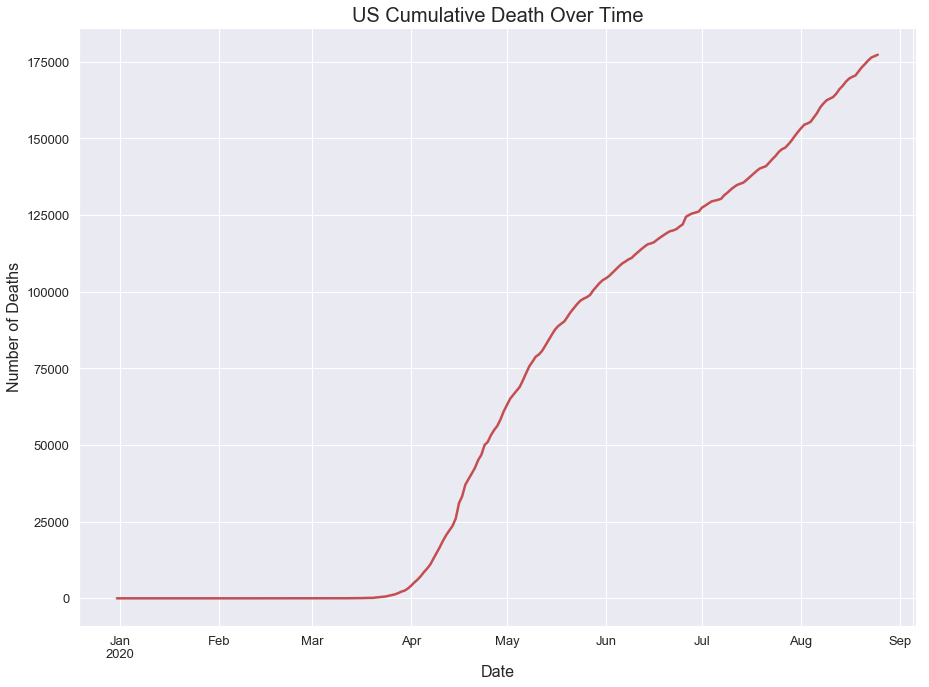

In [47]:
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cumsum_death'].plot(linewidth = 2.5, color='r')

plt.title('US Cumulative Death Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)


plt.show()

In [48]:
covid19_dfA["min_max_cum_cases"] = minmax_scale(covid19_dfA["cumsum_cases"])
covid19_dfA["min_max_cum_death"] = minmax_scale(covid19_dfA["cumsum_death"])

C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [49]:
# comparing US death vs cases that will show increase in testing
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

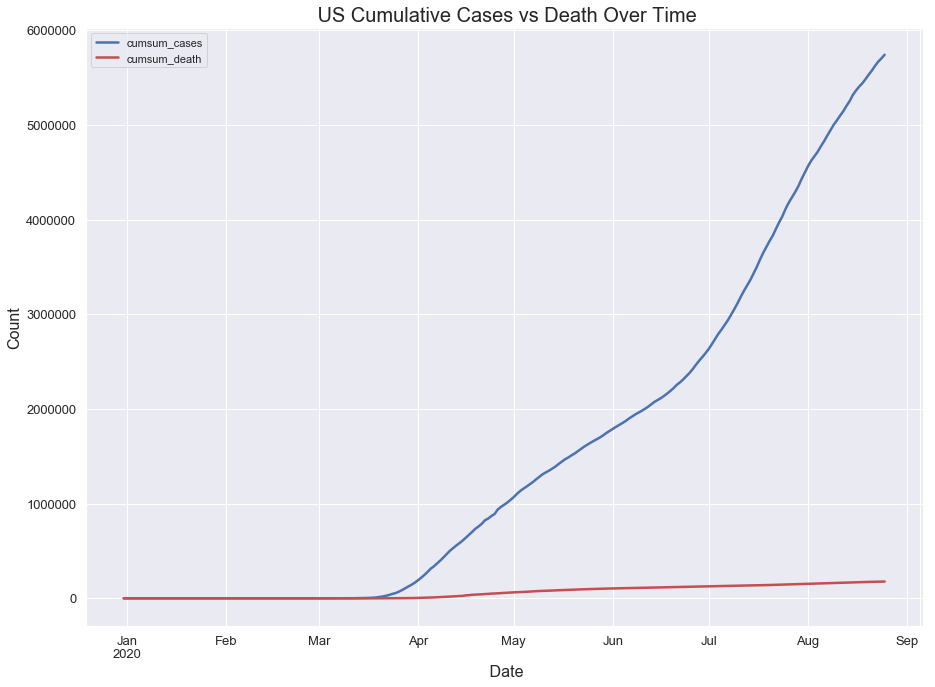

In [50]:
# cumsum death vs cases
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cumsum_cases'].plot(ax= ax, linewidth = 2.5)
US_daily['cumsum_death'].plot(ax= ax, linewidth = 2.5, color = 'r')

plt.title(' US Cumulative Cases vs Death Over Time', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()

plt.show()

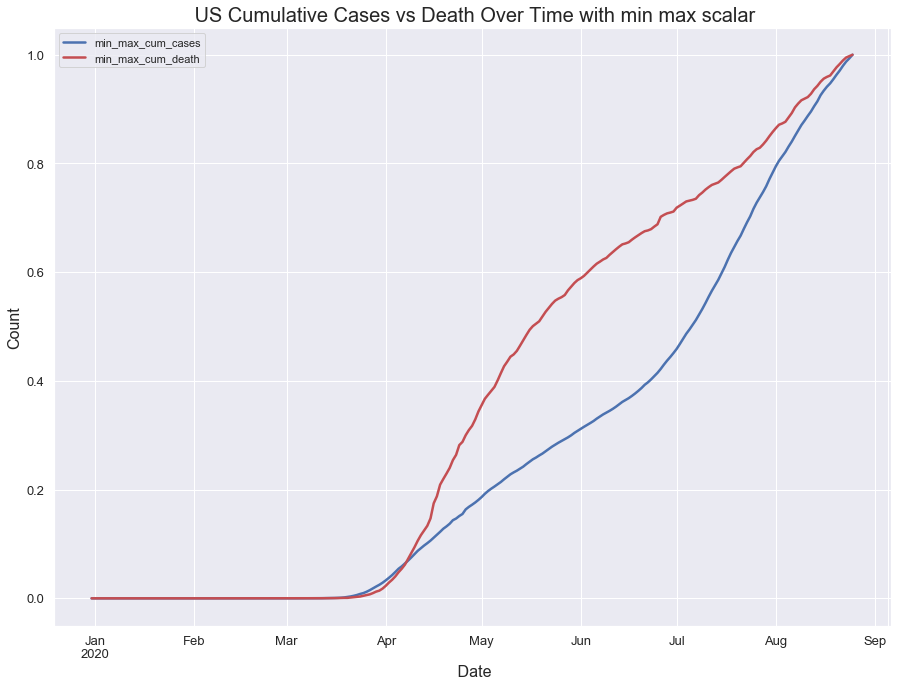

In [51]:
# cumsum death vs cases wtih min max scalar 
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['min_max_cum_cases'].plot(ax= ax, linewidth = 2.5)
US_daily['min_max_cum_death'].plot(ax= ax, linewidth = 2.5, color = 'r')

plt.title(' US Cumulative Cases vs Death Over Time with min max scalar', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()

plt.show()

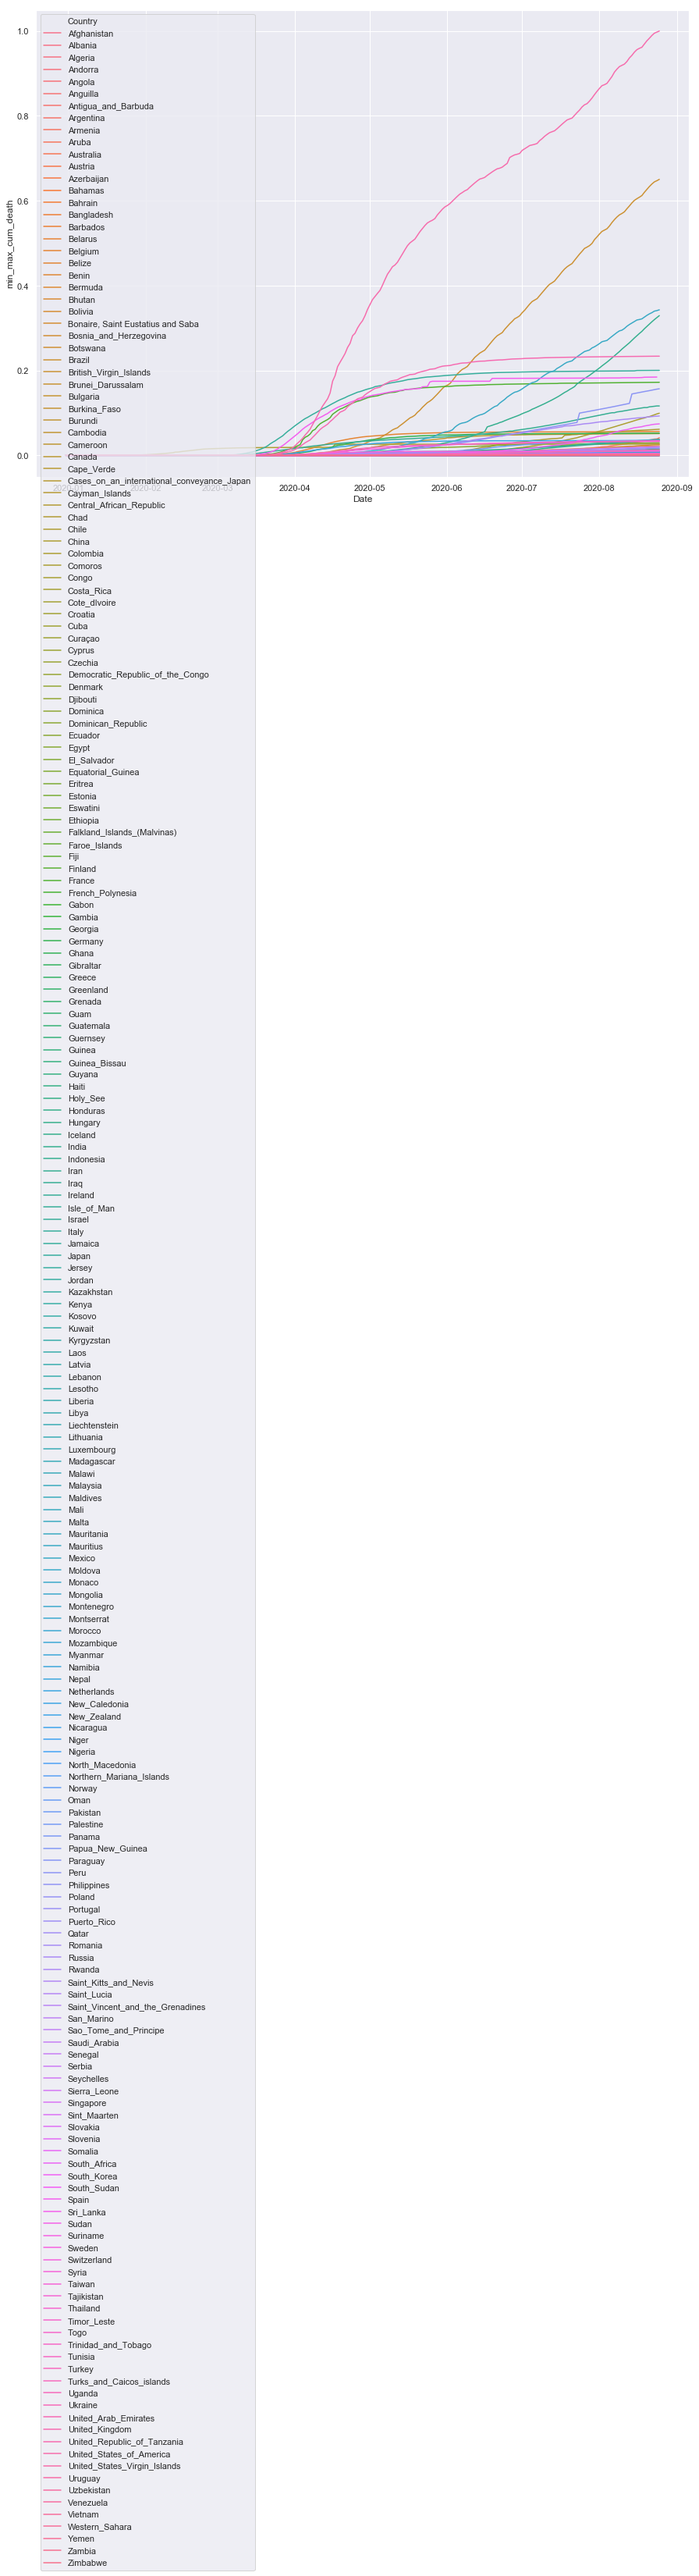

In [52]:
sns.lineplot(x= "Date", y = "min_max_cum_death", data = covid19_dfA, hue = "Country")

In [161]:
top10 = covid19_dfA.loc[covid19_dfA["Country"].isin(covid19_deaths.nlargest(10, ["Death_per_million"])["Country"])]

In [172]:
covid19_deaths.nlargest(11,["Death_per_million"]).drop(columns="min_max_cases").reset_index().drop(columns="index")

,Country,Population,Deaths,Cases,Death_per_million,Death_pct_cases,Cases_per_million
0,San_Marino,34453,42,744,1219.052042,5.645161,21594.636171
1,Belgium,11455519,9996,81998,872.592503,12.190541,7157.947187
2,Peru,32510462,27813,600438,855.509220,4.632119,18469.070049
3,Spain,46937060,32712,407606,696.933297,8.025397,8684.097385
4,Andorra,76177,53,1060,695.748060,5.000000,13914.961209
5,United_Kingdom,66647112,41433,326614,621.677350,12.685617,4900.647458
6,Italy,60359546,35503,260594,588.191966,13.623875,4317.361830
7,Chile,18952035,10916,399568,575.980363,2.731951,21083.118515
8,Sweden,10230185,5813,86721,568.220418,6.703105,8476.972802
9,Brazil,211049519,115309,3622861,546.359928,3.182816,17165.928722


Text(0.5, 1.0, 'Cumalitive cases for top 10 based on Cases per million')

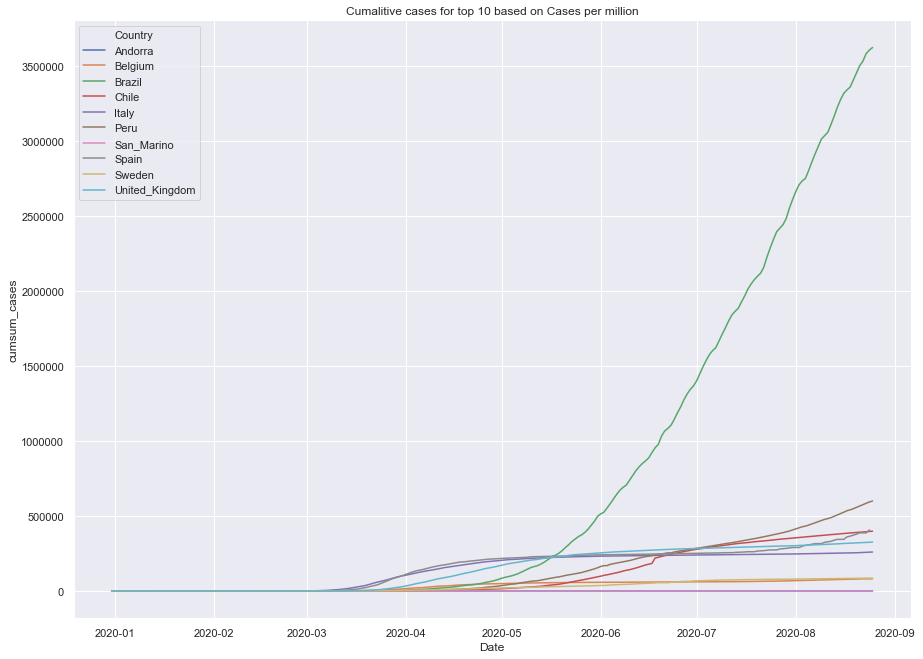

In [162]:
sns.lineplot(x= "Date", y = "cumsum_cases", data = top10, hue = "Country").set_title("Cumalitive cases for top 10 based on Cases per million")


Text(0.5, 1.0, 'Cumalitive cases for top 10 based on Death per million')

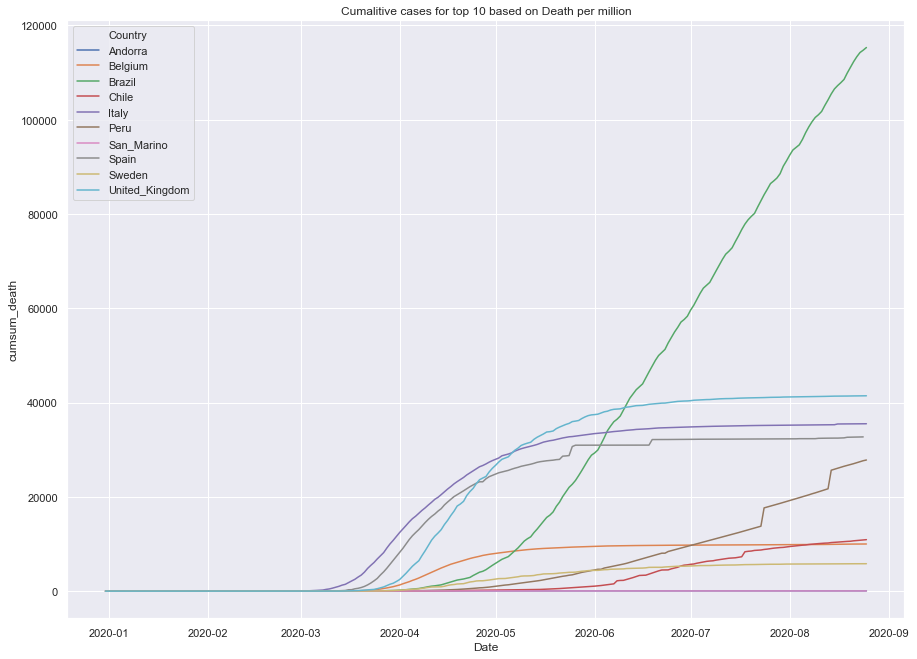

In [163]:
sns.lineplot(x= "Date", y = "cumsum_death", data = top10, hue = "Country").set_title("Cumalitive cases for top 10 based on Death per million")


Text(0.5, 1.0, 'Top 10 country by Cumalitive cases per 100k')

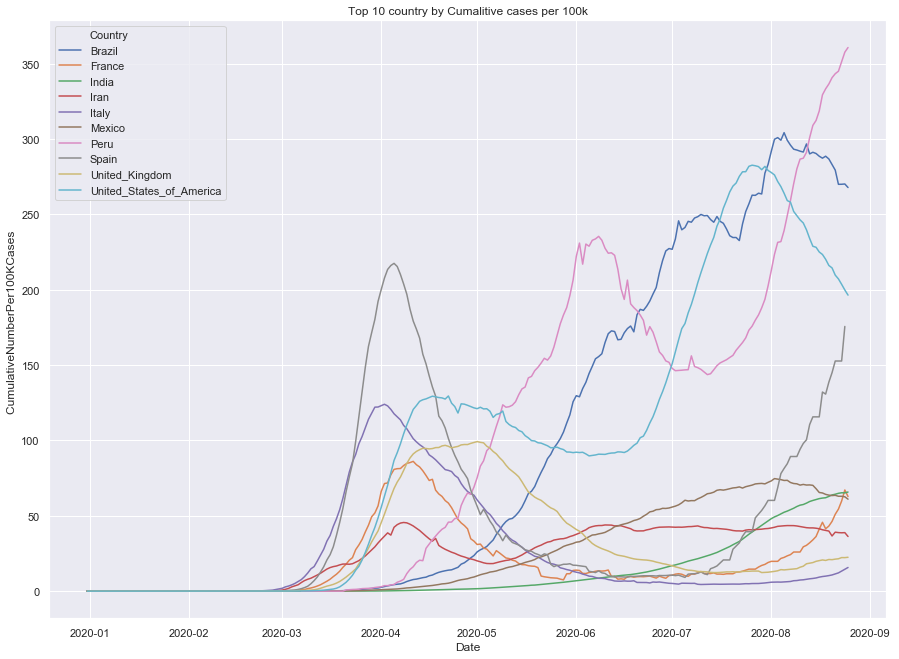

In [57]:
sns.lineplot(x= "Date", y = "CumulativeNumberPer100KCases ", data = top10, hue = "Country").set_title("Top 10 country by Cumalitive cases per 100k")

In [58]:
# standard scaling

sc=StandardScaler()


In [59]:
covid19_dfA["std_cumsum_cases"],covid19_dfA["std_cumsum_death"]=\
sc.fit_transform(covid19_dfA[["cumsum_cases","cumsum_death"]])[:,0],sc.fit_transform(covid19_dfA[["cumsum_cases","cumsum_death"]])[:,1]

C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [60]:
sc.fit_transform(covid19_dfA[["cumsum_cases","cumsum_death"]])[:,1].mean().round()

C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Husein Adenwala\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.0

In [61]:
US_daily[["cumsum_cases","cumsum_death"]]

,cumsum_cases,cumsum_death
Date,,
2020-08-25,5740909,177279
2020-08-24,5702611,176806
2020-08-23,5668105,176362
2020-08-22,5623727,175406
2020-08-21,5573847,174255
2020-08-20,5529842,173177
2020-08-19,5482416,171821
2020-08-18,5438325,170497
2020-08-17,5403269,170052


In [62]:
# comparing US death vs cases that will show increase in testing
UScovid19_df = covid19_dfA[covid19_dfA["Country"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

In [63]:
US_daily.head()

,index,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death,min_max_cum_cases,min_max_cum_death,std_cumsum_cases,std_cumsum_death
Date,,,,,,,,,,,,,,,,
2020-08-25,36797,25,8,2020,38298,473,United_States_of_America,329064917,America,196.470352,5740909,177279,1.000000,1.000000,25.002776,19.063176
2020-08-24,36798,24,8,2020,34506,444,United_States_of_America,329064917,America,199.883660,5702611,176806,0.993329,0.997332,24.834923,19.011832
2020-08-23,36799,23,8,2020,44378,956,United_States_of_America,329064917,America,203.633984,5668105,176362,0.987318,0.994827,24.683689,18.963635
2020-08-22,36800,22,8,2020,49880,1151,United_States_of_America,329064917,America,207.232970,5623727,175406,0.979588,0.989435,24.489189,18.859862
2020-08-21,36801,21,8,2020,44005,1078,United_States_of_America,329064917,America,209.746152,5573847,174255,0.970900,0.982942,24.270574,18.734921


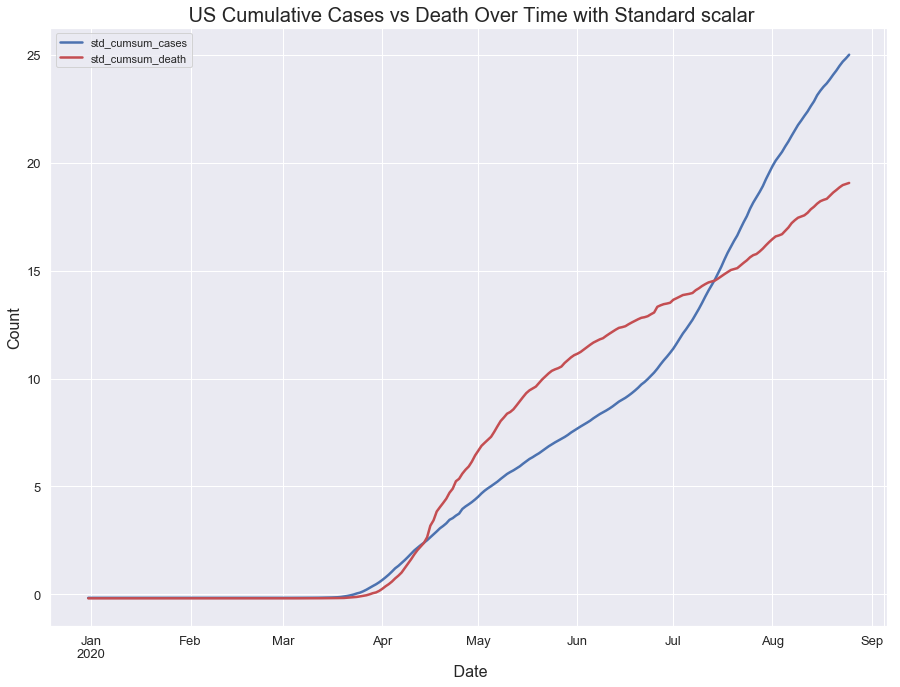

In [64]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 11)})
US_daily['std_cumsum_cases'].plot(ax= ax, linewidth = 2.5)
US_daily['std_cumsum_death'].plot(ax= ax, linewidth = 2.5, color = 'r')

plt.title(' US Cumulative Cases vs Death Over Time with Standard scalar', fontsize = 20)
plt.xlabel(' Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()

plt.show()

In [65]:
t = covid19_dfA["std_cumsum_death"].mean()

In [66]:
covid19_dfA.head()


,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death,min_max_cum_cases,min_max_cum_death,std_cumsum_cases,std_cumsum_death
0,2020-08-25,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749,38070,1397,0.006631,0.007880,0.008314,-0.028813
1,2020-08-24,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112,37999,1387,0.006619,0.007824,0.008003,-0.029898
2,2020-08-23,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112,37999,1387,0.006619,0.007824,0.008003,-0.029898
3,2020-08-22,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619,37894,1385,0.006601,0.007813,0.007543,-0.030115
4,2020-08-21,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766,37856,1385,0.006594,0.007813,0.007376,-0.030115


In [67]:
covidcont = covid19_dfA.sort_values(["Continent","Date"]).groupby(["Continent","Date"])["cumsum_cases"].sum().reset_index()

In [68]:
covidcont = covidcont.set_index("Date")
covidcont.head()

,Continent,cumsum_cases
Date,,
2019-12-31,Africa,0
2020-01-01,Africa,0
2020-01-02,Africa,0
2020-01-03,Africa,0
2020-01-04,Africa,0


In [69]:

#covidcont['month'] = covidcont['Date'].dt.strftime('%b')

Text(0.5, 1.0, 'Cumalitive Cases by Continents')

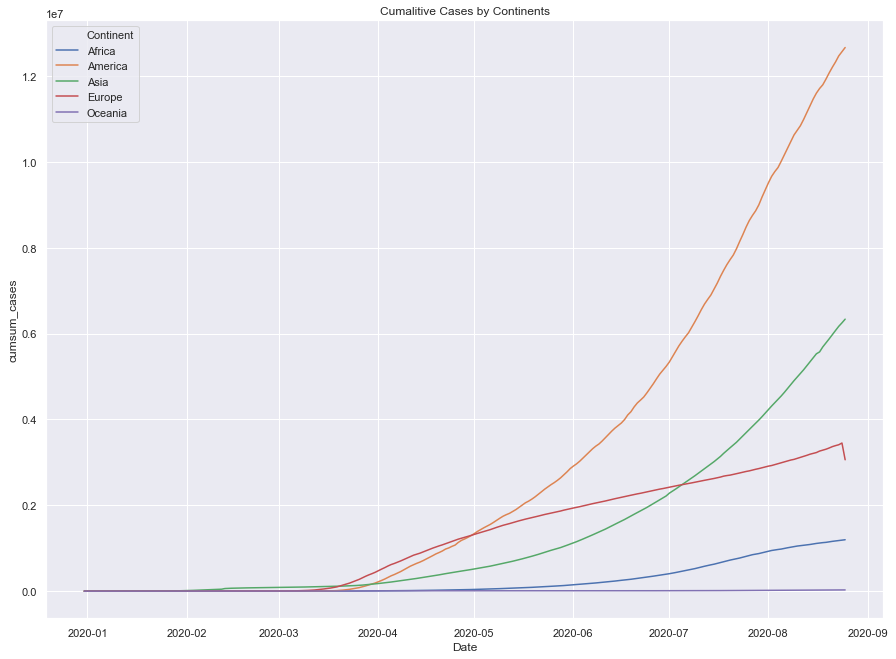

In [119]:
fig, ax = plt.subplots()
sns.lineplot(x= covidcont.index, y = 'cumsum_cases' , hue = "Continent", data = covidcont ).set_title("Cumalitive Cases by Continents")

#ax.set_xticklabels(["on/short","on/long",'off/short','off/long'])

In [71]:
covid19_dfA.head()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death,min_max_cum_cases,min_max_cum_death,std_cumsum_cases,std_cumsum_death
0,2020-08-25,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749,38070,1397,0.006631,0.007880,0.008314,-0.028813
1,2020-08-24,24,8,2020,0,0,Afghanistan,38041757,Asia,2.484112,37999,1387,0.006619,0.007824,0.008003,-0.029898
2,2020-08-23,23,8,2020,105,2,Afghanistan,38041757,Asia,2.484112,37999,1387,0.006619,0.007824,0.008003,-0.029898
3,2020-08-22,22,8,2020,38,0,Afghanistan,38041757,Asia,2.310619,37894,1385,0.006601,0.007813,0.007543,-0.030115
4,2020-08-21,21,8,2020,97,2,Afghanistan,38041757,Asia,2.415766,37856,1385,0.006594,0.007813,0.007376,-0.030115


In [72]:
covid19_dfA["total_cumsum_cases"]= covid19_dfA.sort_values("Date").groupby("Date")["Cases"].cumsum()

In [73]:
covid19_dfA.sort_values("Date").tail()
#.sort_values("Date").groupby("Date")["Cases"].cumsum()

,Date,Day,Month,Year,Cases,Deaths,Country,Population,Continent,CumulativeNumberPer100KCases,cumsum_cases,cumsum_death,min_max_cum_cases,min_max_cum_death,std_cumsum_cases,std_cumsum_death,total_cumsum_cases
2302,2020-08-25,25,8,2020,152,1,Azerbaijan,10047719,Europe,17.705511,35426,519,0.006171,0.002928,-0.003274,-0.124119,211989
8233,2020-08-25,25,8,2020,643,7,Costa_Rica,5047561,America,209.824111,34463,362,0.006003,0.002042,-0.007495,-0.141162,212632
21458,2020-08-25,25,8,2020,90,0,Luxembourg,613894,Europe,94.153062,7794,124,0.001358,0.000699,-0.124380,-0.166997,212722
34864,2020-08-25,25,8,2020,0,0,Timor_Leste,1293120,Asia,0.077332,26,0,0.000005,0.000000,-0.158425,-0.180457,212722
0,2020-08-25,25,8,2020,71,10,Afghanistan,38041757,Asia,2.670749,38070,1397,0.006631,0.007880,0.008314,-0.028813,212793


In [74]:
cd1 = covid19_dfA.groupby("Date")["Cases"].sum().cumsum().reset_index()

In [75]:
cd2 = covid19_dfA.groupby("Date")["Deaths"].sum().cumsum().reset_index()

In [76]:
cd1.tail()

,Date,Cases
234,2020-08-21,22730152
235,2020-08-22,22983697
236,2020-08-23,23250117
237,2020-08-24,23474527
238,2020-08-25,23687320


In [77]:
cd1 = cd1.set_index("Date")

In [78]:
cd2 = cd2.set_index("Date")

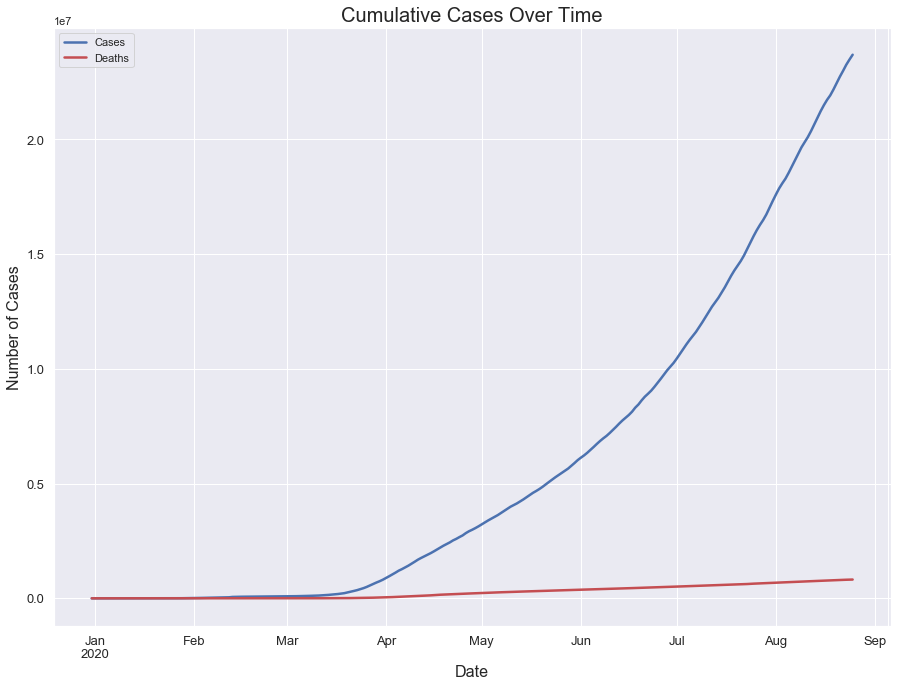

In [79]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(15, 11)})
cd1['Cases'].plot(linewidth = 2.5)
cd2["Deaths"].plot(linewidth = 2.5, color= 'r')

plt.title('Cumulative Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)
leg = ax.legend()
plt.show()

In [80]:
cd1.sort_index().tail(1).reset_index()
cd2.sort_index().tail(1).reset_index()

,Date,Deaths
0,2020-08-25,817854


In [81]:
covidcont.groupby("Continent")["cumsum_cases"].max()

Continent
Africa      1196602
America    12660833
Asia        6334181
Europe      3449313
Oceania       27978
Name: cumsum_cases, dtype: int64

In [82]:
covid19_dfA["Cases"].max()

78427

In [117]:
covid19_deaths.loc[(covid19_deaths["Country"]== "Russia")|(covid19_deaths["Country"]== "Iran")]


,Country,Population,Deaths,Cases,Death_per_million,Death_pct_cases,min_max_cases
94,Iran,82913893,20643,358905,248.969132,5.751661,0.062517
159,Russia,145872260,16448,961493,112.756188,1.710673,0.167481


In [127]:
covid19_deaths.sort_values("Death_pct_cases").head(50)
#covid19_deaths.sort_values("Death_pct_cases").tail(10)

,Country,Population,Deaths,Cases,Death_per_million,Death_pct_cases,min_max_cases
109,Laos,7169456,0,22,0.000000,0.000000,0.000003
80,Grenada,112002,0,24,0.000000,0.000000,0.000004
33,Cambodia,16486542,0,273,0.000000,0.000000,0.000047
79,Greenland,56660,0,14,0.000000,0.000000,0.000002
138,New_Caledonia,282757,0,23,0.000000,0.000000,0.000003
189,Timor_Leste,1293120,0,26,0.000000,0.000000,0.000004
24,"Bonaire, Saint Eustatius and Saba",25983,0,13,0.000000,0.000000,0.000002
56,Dominica,71808,0,20,0.000000,0.000000,0.000003
22,Bhutan,763094,0,156,0.000000,0.000000,0.000027
77,Gibraltar,33706,0,248,0.000000,0.000000,0.000043


In [128]:
555/29

19.137931034482758